In [1]:
#Cargamos datos
import pandas as pd

colmap = {
    'Evolución de nuevos casos': 'new_cases'
}
df = pd.read_csv('covid19_cl_Resumen Allkun Analítica_Gráfico combinado.csv').rename(columns=colmap).drop(columns=['Evolución acumulada de casos'])
df['total_cases'] = df.new_cases.cumsum()

In [2]:
import datetime

def nday2datetime(nday):
    base_date = datetime.date(2020, 3, 2)
    return base_date + datetime.timedelta(days=nday)

df['ds'] = pd.Series(df.index).apply(nday2datetime)

In [3]:
# Proyectamos con nuevos casos

prophet_df = df.drop(columns=['fechainiciosintoma', 'total_cases']).rename(columns={'new_cases': 'y'})

In [4]:
from fbprophet import Prophet

m = Prophet()
m.fit(prophet_df)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [5]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
56,2020-04-27
57,2020-04-28
58,2020-04-29
59,2020-04-30
60,2020-05-01


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
56,2020-04-27,712.426462,662.755886,762.082565
57,2020-04-28,730.034430,678.329655,779.445047
58,2020-04-29,751.045826,695.896867,806.602384
59,2020-04-30,715.256177,659.655916,766.910928
60,2020-05-01,757.539835,702.139474,808.715634


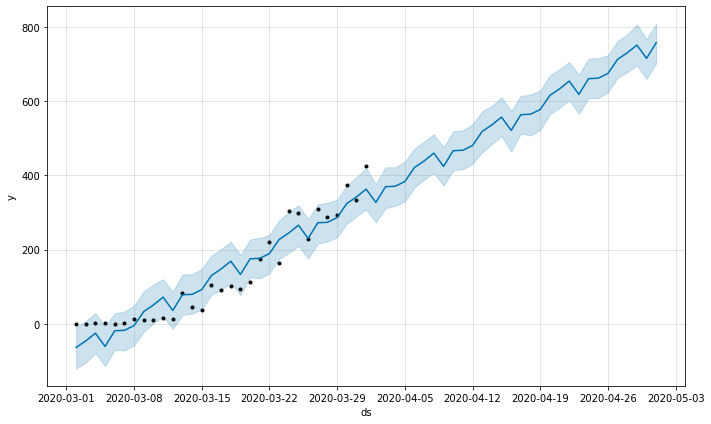

In [7]:
fig1 = m.plot(forecast)

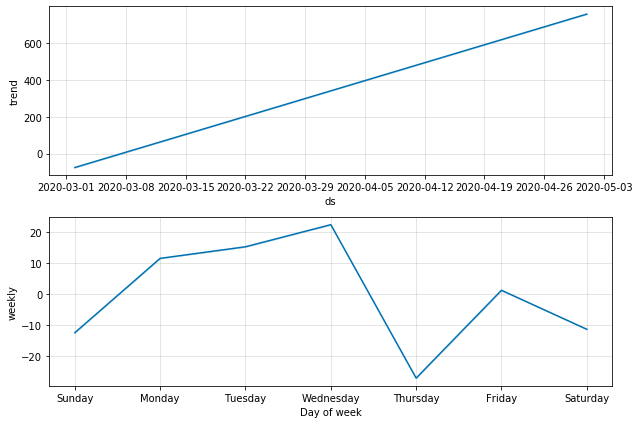

In [8]:
fig2 = m.plot_components(forecast)

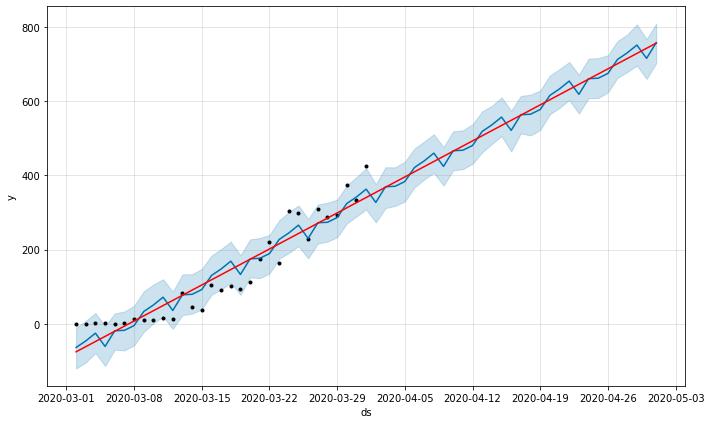

In [9]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)